In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/outputs/sample_b/pca_model_fine_tuning.csv')
for params, df in results.groupby(['param_max_depth', 'param_min_samples_leaf']):
    print(params)
    display(df[['mean_test_score', 'std_test_score']].mean())

(3, 1)


mean_test_score    0.311585
std_test_score     0.016323
dtype: float64

(3, 5)


mean_test_score    0.311533
std_test_score     0.016258
dtype: float64

(3, 10)


mean_test_score    0.311118
std_test_score     0.016198
dtype: float64

(50, 1)


mean_test_score    0.704742
std_test_score     0.011361
dtype: float64

(50, 5)


mean_test_score    0.691032
std_test_score     0.010237
dtype: float64

(50, 10)


mean_test_score    0.663853
std_test_score     0.009421
dtype: float64

(100, 1)


mean_test_score    0.704742
std_test_score     0.011361
dtype: float64

(100, 5)


mean_test_score    0.691032
std_test_score     0.010237
dtype: float64

(100, 10)


mean_test_score    0.663853
std_test_score     0.009421
dtype: float64

---

In [3]:
# #### THE FINAL CHOICE IS: max_depth': 50, 'min_samples_leaf': 1
rss = [516, 1919, 700]

X_train = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_b/pca_X_train_val.csv')
y_train = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_b/y_train_val.csv')

regression_forest = dict()

for rs in rss:
    regression_forest[rs] = RandomForestRegressor(max_depth=50,
                                          min_samples_leaf=1,
                                          n_jobs=-1, 
                                          random_state=rs
                                          )

    regression_forest[rs].fit(X_train, y_train.iloc[:, 0])

In [4]:
with open('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_b/trained_models/pca_final_model.pkl', 'wb') as f:
    pickle.dump(regression_forest, f)

with open('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_b/trained_models/pca_final_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [5]:
# transform = {0.0:0,0.1:1,0.2:2,0.3:3,0.4:4,0.5:5,0.6:6,0.7:7,0.8:8,0.9:9,1.0:10}

scores = dict()

for rs in rss:
    y_train_pred = model[rs].predict(X_train).round(0)
    scores[rs] = (r2_score(y_train_pred, y_train), 
                  accuracy_score(pd.Series(y_train_pred), pd.Series(y_train.iloc[:, 0])))

print(np.mean([v[0] for v in scores.values()]), np.mean([v[1] for v in scores.values()]))


X_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_b/pca_X_test.csv')
y_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_b/y_test.csv')

scores = dict()

for rs in rss:
    y_test_pred = model[rs].predict(X_test).round(0)
    scores[rs] = (r2_score(y_test_pred, y_test), 
                  accuracy_score(pd.Series(y_test_pred), pd.Series(y_test.iloc[:, 0])))

print(np.mean([v[0] for v in scores.values()]), np.mean([v[1] for v in scores.values()]))

0.9127388173331593 0.5934598012646792
0.5966769266283533 0.3231021076324944


In [6]:
def predict_dispersion(crosstab):
    total = 0
    for i, row in enumerate(crosstab.to_numpy()):
        for j, val in enumerate(row):
            total += val * abs(j - i)
    return total/(crosstab.sum().sum())*(crosstab.shape[1])

In [7]:
train_mat= pd.crosstab(y_train.iloc[:, 0], y_train_pred)
test_mat = pd.crosstab(y_test.iloc[:,0], y_test_pred)

In [8]:
print(train_mat.shape)
print(test_mat.shape)

print(predict_dispersion(train_mat))
print(predict_dispersion(test_mat))

(11, 11)
(11, 11)
5.4087804878048775
13.100061387354206


---

In [9]:
results = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/outputs/sample_b/pca_model_classification_fine_tuning.csv')
for params, df in results.groupby(['param_max_depth', 'param_min_samples_leaf']):
    print(params)
    display(df[['mean_test_score', 'std_test_score']].mean())

(3, 1)


mean_test_score    0.208888
std_test_score     0.007800
dtype: float64

(3, 5)


mean_test_score    0.211056
std_test_score     0.005130
dtype: float64

(3, 10)


mean_test_score    0.210299
std_test_score     0.007059
dtype: float64

(50, 1)


mean_test_score    0.421677
std_test_score     0.015716
dtype: float64

(50, 5)


mean_test_score    0.408454
std_test_score     0.014501
dtype: float64

(50, 10)


mean_test_score    0.393493
std_test_score     0.015599
dtype: float64

(100, 1)


mean_test_score    0.425799
std_test_score     0.017880
dtype: float64

(100, 5)


mean_test_score    0.411163
std_test_score     0.013065
dtype: float64

(100, 10)


mean_test_score    0.394578
std_test_score     0.013639
dtype: float64

In [10]:
#### THE FINAL CHOICE IS: max_depth': 100, 'min_samples_leaf': 1

rss = [516, 1919, 700]

X_train = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_b/pca_X_train_val.csv')
y_train = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_b/y_train_val.csv')

classification_forest = dict()

for rs in rss:
    classification_forest[rs] = RandomForestClassifier(max_depth=100,
                                          min_samples_leaf=1,
                                          n_jobs=-1, 
                                          random_state=rs
                                          )

    classification_forest[rs].fit(X_train, y_train.iloc[:, 0])

with open('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_b/trained_models/pca_final_classification_model.pkl', 'wb') as f:
    pickle.dump(classification_forest, f)

In [11]:
with open('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_b/trained_models/pca_final_classification_model.pkl', 'rb') as f:
    model = pickle.load(f)

# transform = {0.0:0,0.1:1,0.2:2,0.3:3,0.4:4,0.5:5,0.6:6,0.7:7,0.8:8,0.9:9,1.0:10}

scores = dict()

for rs in rss:
    y_train_pred = model[rs].predict(X_train).round(0)
    scores[rs] = (r2_score(y_train_pred, y_train.iloc[:, 0]), 
                  accuracy_score(pd.Series(y_train_pred), pd.Series(y_train.iloc[:, 0])))

print(np.mean([v[0] for v in scores.values()]), np.mean([v[1] for v in scores.values()]))


X_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_b/pca_X_test.csv')
y_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_b/y_test.csv')

scores = dict()

for rs in rss:
    y_test_pred = model[rs].predict(X_test).round(0)
    scores[rs] = (r2_score(y_test_pred, y_test.iloc[:, 0]), 
                  accuracy_score(pd.Series(y_test_pred), pd.Series(y_test.iloc[:, 0])))

print(np.mean([v[0] for v in scores.values()]), np.mean([v[1] for v in scores.values()]))

0.9386396226419853 0.9024390243902439
0.636704147102424 0.43871495805197464


In [12]:
train_mat= pd.crosstab(y_train.iloc[:,0], y_train_pred)
test_mat = pd.crosstab(y_test.iloc[:,0], y_test_pred)

In [13]:
print(train_mat.shape)
print(test_mat.shape)

print(predict_dispersion(train_mat))
print(predict_dispersion(test_mat))

(11, 11)
(11, 11)
2.1821138211382114
13.100061387354206


---

In [14]:
with open('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_b/trained_models/pca_final_classification_model.pkl', 'rb') as f:
    classification_forest = pickle.load(f)

with open('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_b/trained_models/pca_final_model.pkl', 'rb') as f:
    regression_forest = pickle.load(f)

In [15]:
y_train = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_b/y_train_val.csv')
y_test = pd.read_csv('/nfs/home/genovese/thesis-wildfire-genovese/only_human_study/database/sample_b/y_test.csv')

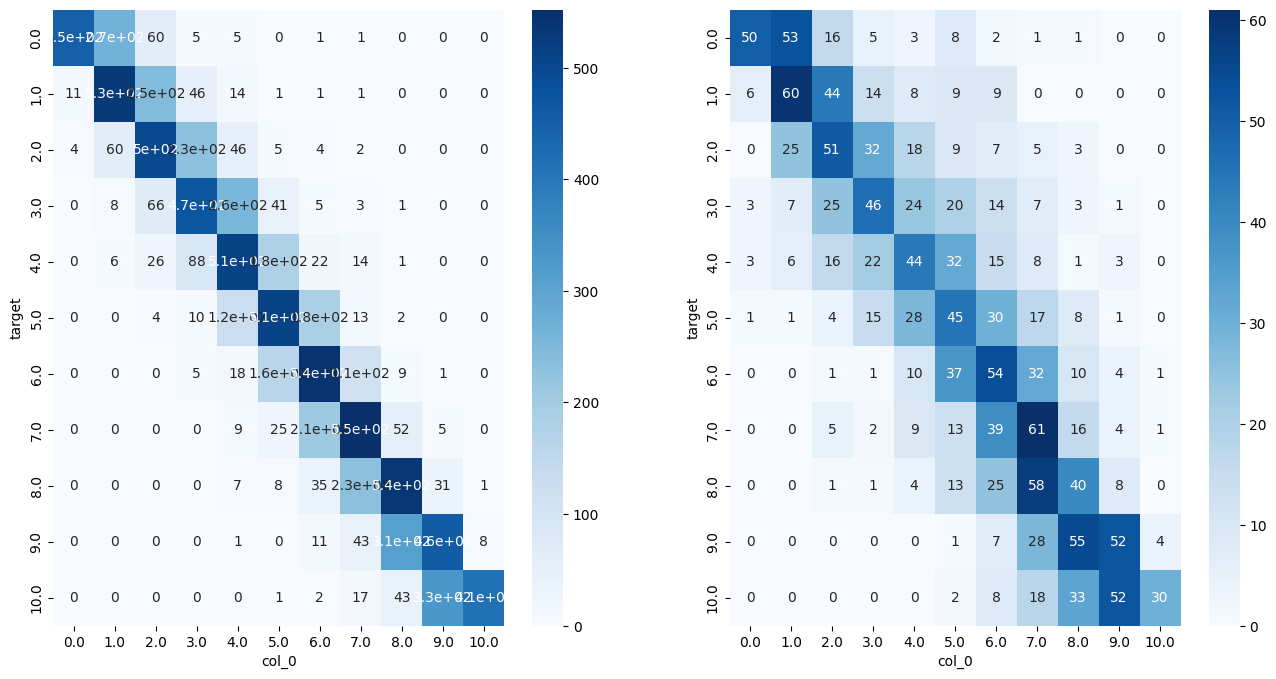

In [16]:
fig, ax = plt.subplots(1,2, figsize=(16, 8))

sns.heatmap(pd.crosstab(
                        y_train.iloc[:, 0], 
                        regression_forest[516].predict(X_train).round(0)
                        ),
                        cmap='Blues',
                        annot = True,
                        ax=ax[0]
                        )

sns.heatmap(pd.crosstab(
                        y_test.iloc[:, 0], 
                        regression_forest[516].predict(X_test).round(0)
                        ),
                        cmap='Blues',
                        annot = True,
                        ax=ax[1]
                        )

plt.show()

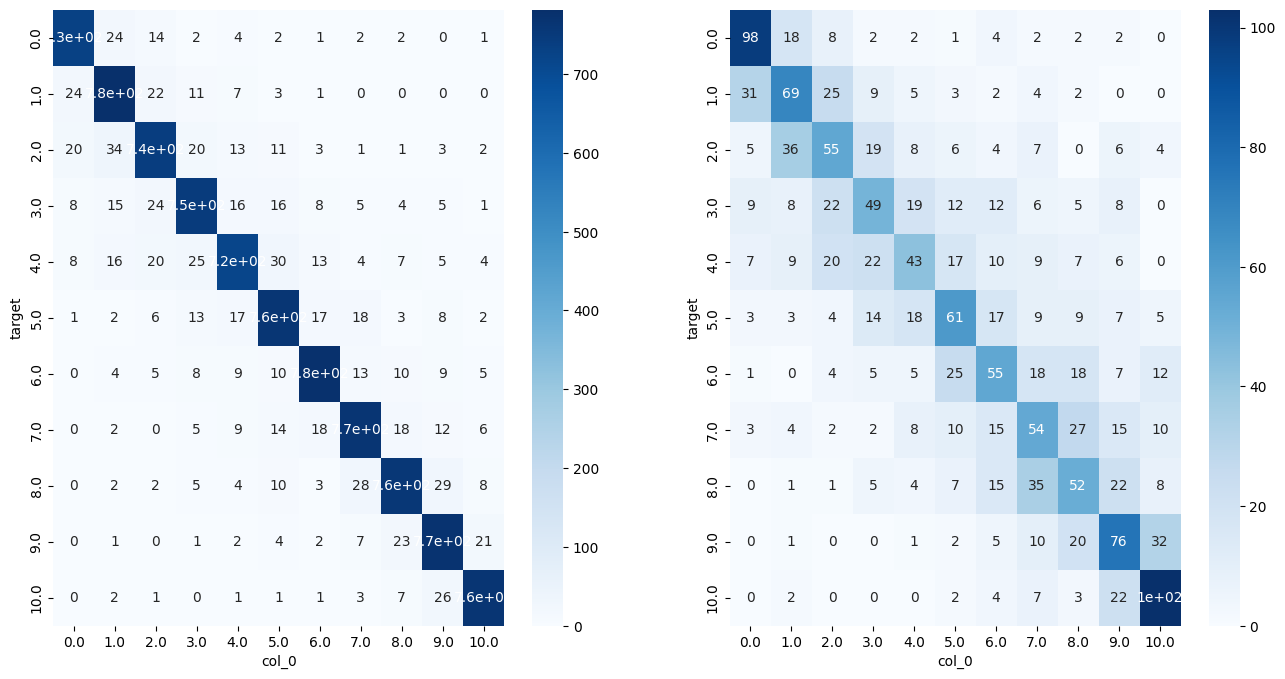

In [17]:
fig, ax = plt.subplots(1,2, figsize=(16, 8))

sns.heatmap(pd.crosstab(
                        y_train.iloc[:, 0], 
                        classification_forest[516].predict(X_train)
                        ),
                        cmap='Blues',
                        annot = True,
                        ax=ax[0]
                        )

sns.heatmap(pd.crosstab(
                        y_test.iloc[:, 0], 
                        classification_forest[516].predict(X_test)
                        ),
                        cmap='Blues',
                        annot = True,
                        ax=ax[1]
                        )

plt.show()